In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
def calculateDistance(x1,y1,x2,y2):
    dist =np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return dist

def calculate_total_distance(sequence_id):
    total_distance = 0
    count = 0
    for i in range(len(sequence_id)-1):
        start_id = sequence_id[i]
        next_id = sequence_id[i+1]
        x1 = np.asarray(cities[cities['CityId']==start_id]['X']).ravel()[0]
        y1 = np.asarray(cities[cities['CityId']==start_id]['Y']).ravel()[0]
        x2 = np.asarray(cities[cities['CityId']==next_id]['X']).ravel()[0]
        y2 = np.asarray(cities[cities['CityId']==next_id]['Y']).ravel()[0]
        dist = calculateDistance(x1,y1,x2,y2)
        prime_city = cities[cities['CityId']==start_id]['is_prime'].ravel()[0]
        if i%10 == 0 and prime_city == False and sequence_id[i] != 0:
            dist = dist*1.1
        else:
            dist = dist
        total_distance += dist
        count += 1
        if count%10000==0:
            print(count)        
    return total_distance

def is_prime(n):
    if n > 2:
        i = 2
        while i ** 2 <= n:
            if n % i:
                i += 1
            else:
                return False
    elif n != 2:
        return False
    return True

def generate_main_cluster(data, num_cluster):
    kmeans = KMeans(n_clusters= num_cluster)
    kmeans.fit_transform(data)
    cluster = kmeans.labels_
    center = kmeans.cluster_centers_
    return cluster, np.asarray(center)

In [3]:
def generate_sub_cluster2(cities, cluster_num, num_sub_cluster, column, col_num):
    cluster = cities[column==cluster_num]
    if len(cluster)==1:
        cluster['sub_cluster'+str(col_num)] = (np.asarray(cluster['sub_cluster2'])*10)[0]
        sub_cluster_centers = pd.DataFrame()
        center_index = []
        cluster_center_x = []
        cluster_center_y = []
        for i in range(len(cluster['sub_cluster2'])):
            center_index.append(cluster_num*10+i)
            center_x = np.asarray(sub_cluster_centers2[sub_cluster_centers2['cluster_center']==cluster_num]['center_x'])[0]
            center_y = np.asarray(sub_cluster_centers2[sub_cluster_centers2['cluster_center']==cluster_num]['center_y'])[0]
            cluster_center_x.append(center_x)
            cluster_center_y.append(center_y)
            
        sub_cluster_centers['center_x'] = cluster_center_x
        sub_cluster_centers['center_y'] = cluster_center_y
        sub_cluster_centers['cluster_center'] = center_index
        sub_cluster_centers['main_center'] = np.nan
        sub_cluster_centers['main_center'] = sub_cluster_centers['main_center'].fillna(int(cluster_num))
        return cluster[['CityId','sub_cluster'+str(col_num)]], sub_cluster_centers
    
    else:
        if len(cluster) <= num_sub_cluster:
            num_sub_cluster = len(cluster)
        else:
            num_sub_cluster = num_sub_cluster
            
        cluster_coord = cluster[['X','Y']]
        kmeans = KMeans(n_clusters= num_sub_cluster)
        kmeans.fit_transform(cluster_coord)
        cluster_label = kmeans.labels_
        cluster['sub_cluster'+str(col_num)] = cluster_label+10*cluster_num
    
        sub_cluster_centers = pd.DataFrame()
        center_index = []
        cluster_center_x = []
        cluster_center_y = []
        for i in range(len(kmeans.cluster_centers_)):
            center_index.append(cluster_num*10+i)
            cluster_center_x.append(kmeans.cluster_centers_[i][0])
            cluster_center_y.append(kmeans.cluster_centers_[i][1])
        
        sub_cluster_centers['center_x'] = cluster_center_x
        sub_cluster_centers['center_y'] = cluster_center_y
        sub_cluster_centers['cluster_center'] = center_index
        sub_cluster_centers['main_center'] = np.nan
        sub_cluster_centers['main_center'] = sub_cluster_centers['main_center'].fillna(int(cluster_num))
        return cluster[['CityId','sub_cluster'+str(col_num)]], sub_cluster_centers

In [4]:
def generate_sub_cluster3(cities, cluster_num, num_sub_cluster, column, col_num):
    cluster = cities[column==cluster_num]
    if len(cluster)==1:
        cluster['sub_cluster'+str(col_num)] = (np.asarray(cluster['sub_cluster3'])*10)[0]
        sub_cluster_centers = pd.DataFrame()
        center_index = []
        cluster_center_x = []
        cluster_center_y = []
        for i in range(len(cluster['sub_cluster3'])):
            center_index.append(cluster_num*10+i)
            center_x = np.asarray(sub_cluster_centers3[sub_cluster_centers3['cluster_center']==cluster_num]['center_x'])[0]
            center_y = np.asarray(sub_cluster_centers3[sub_cluster_centers3['cluster_center']==cluster_num]['center_y'])[0]
            cluster_center_x.append(center_x)
            cluster_center_y.append(center_y)
            
        sub_cluster_centers['center_x'] = cluster_center_x
        sub_cluster_centers['center_y'] = cluster_center_y
        sub_cluster_centers['cluster_center'] = center_index
        sub_cluster_centers['main_center'] = np.nan
        sub_cluster_centers['main_center'] = sub_cluster_centers['main_center'].fillna(int(cluster_num))
        return cluster[['CityId','sub_cluster'+str(col_num)]], sub_cluster_centers
    
    else:
        if len(cluster) <= num_sub_cluster:
            num_sub_cluster = len(cluster)
        else:
            num_sub_cluster = num_sub_cluster
            
        cluster_coord = cluster[['X','Y']]
        kmeans = KMeans(n_clusters= num_sub_cluster)
        kmeans.fit_transform(cluster_coord)
        cluster_label = kmeans.labels_
        cluster['sub_cluster'+str(col_num)] = cluster_label+10*cluster_num
    
        sub_cluster_centers = pd.DataFrame()
        center_index = []
        cluster_center_x = []
        cluster_center_y = []
        for i in range(len(kmeans.cluster_centers_)):
            center_index.append(cluster_num*10+i)
            cluster_center_x.append(kmeans.cluster_centers_[i][0])
            cluster_center_y.append(kmeans.cluster_centers_[i][1])
        
        sub_cluster_centers['center_x'] = cluster_center_x
        sub_cluster_centers['center_y'] = cluster_center_y
        sub_cluster_centers['cluster_center'] = center_index
        sub_cluster_centers['main_center'] = np.nan
        sub_cluster_centers['main_center'] = sub_cluster_centers['main_center'].fillna(int(cluster_num))
        return cluster[['CityId','sub_cluster'+str(col_num)]], sub_cluster_centers

In [5]:
def batch_sequence_update(initial_seq, data, k):
    batch_total = int(len(initial_seq)/k)

    new_seq = [0]
    for i in range(batch_total+1):
        start_num = len(new_seq)
        remaining_id = len(np.asarray(initial_seq[start_num:]))
    
        if remaining_id <= k:
            batch_ids = np.asarray(initial_seq[start_num:-1])
            k = remaining_id-1
        else:
            batch_ids = np.asarray(initial_seq[start_num:start_num+k])
            k = k
        if len(batch_ids)==0:
            continue
        
        batch_seq = shuffle_batch(batch_ids, data, new_seq, k)
        for id_num in batch_seq:
            new_seq.append(id_num)
        if remaining_id <= k:
            break
            
    new_seq = np.asarray(new_seq)
    updated_seq = np.append(new_seq, 0)
    return updated_seq

import random
import itertools
def shuffle_batch(batch_ids, data, new_seq, k):
    permutations = list(itertools.permutations(range(k)))
    permutations = np.asarray(permutations)
    
    start_coord = data[new_seq[-1]]
    next_batch_coord = data[initial_seq[len(new_seq)+k]]
    
    tenth_index = 0
    for index in range(k):
        if (len(new_seq)+index)%10==0:
            tenth_index = initial_seq[len(new_seq)+index]

    batch_coord = []
    for ids in batch_ids:
        batch_coord.append(data[ids])
    
    total_distance = []
    shuffled_sequence = []
    
    for perm in permutations:
        shuffled_sequence.append(perm)
        distances = []  
        dist_start = calculateDistance(start_coord[0], start_coord[1], batch_coord[perm[0]][0], batch_coord[perm[0]][1])
        dist_last = calculateDistance(batch_coord[perm[-1]][0], batch_coord[perm[-1]][1], next_batch_coord[0], next_batch_coord[1])
        distances.append(dist_start)
        
        if batch_ids[perm[-1]] == tenth_index and np.asarray(cities[cities['CityId']==tenth_index]['is_prime'])==False and tenth_index != 0:
            dist_last = dist_last*1.1
        else:
            dist_last = dist_last  
        distances.append(dist_last)

        for j in range(len(perm)-1):       
            dist = calculateDistance(batch_coord[perm[j]][0], batch_coord[perm[j]][1], batch_coord[perm[j+1]][0], batch_coord[perm[j+1]][1])
            if batch_ids[perm[j]]==tenth_index and np.asarray(cities[cities['CityId']==tenth_index]['is_prime'])==False and tenth_index != 0:
                dist = dist*1.1
            else:
                dist = dist
            distances.append(dist)
        total_distance.append(np.sum(distances))
        
    min_lenght = np.asarray(total_distance).min()  
    best_seq = np.asarray(shuffled_sequence)[np.argmin(total_distance)]
    
    id_seq = []
    for i in best_seq:
        id_match = batch_ids[i]
        id_seq.append(id_match)
    
    return id_seq

In [6]:
def generate_main_cluster_path(centers):
    center_count = len(centers)
    permutations = list(itertools.permutations(range(center_count)))
    permutations = np.asarray(permutations)
    start_coord_x = cities[cities['CityId']==0]['X']
    start_coord_y = cities[cities['CityId']==0]['Y']
    start_coord = [start_coord_x, start_coord_y]
    
    total_dist = []
    sequence = []
    for perm in permutations:
        sequence.append(perm)
        distances = []        
        dist_start = calculateDistance(start_coord[0], start_coord[1], centers[perm[0]][0], centers[perm[0]][1])
        dist_last = calculateDistance(centers[perm[-1]][0], centers[perm[-1]][1], start_coord[0], start_coord[1])
        distances.append(dist_start)
        distances.append(dist_last)
        
        for j in range(len(perm)-1):
            dist = calculateDistance(centers[perm[j]][0], centers[perm[j]][1], centers[perm[j+1]][0], centers[perm[j+1]][1])
            distances.append(dist)
        total_dist.append(np.sum(distances))
        
    min_lenght = np.asarray(total_dist).min()  
    best_seq = np.asarray(sequence)[np.argmin(total_dist)]
    return best_seq  

In [7]:
def sub_cluster_path(sub_cluster_center, num, parent_cluster_seq, parent_cluster_centers):
    parent_num = parent_cluster_seq[num]
    cluster_group = sub_cluster_center[sub_cluster_center['main_center']==parent_num]
    center_count = len(cluster_group)

    if center_count == 1:
        cluster_seq = np.asarray(cluster_group['cluster_center'])[0]
        
    else:
        permutations = list(itertools.permutations(range(center_count)))
        permutations = np.asarray(permutations)
        
        if parent_cluster_seq[0]==parent_num:
            start_coord_x = cities[cities['CityId']==0]['X'][0]
            start_coord_y = cities[cities['CityId']==0]['Y'][0]
            start_coord = [start_coord_x, start_coord_y]
 
        else:
            start_coord_x = np.asarray(sub_cluster_center[sub_cluster_center['cluster_center']==new_seq[-1]]['center_x']).ravel()
            start_coord_y = np.asarray(sub_cluster_center[sub_cluster_center['cluster_center']==new_seq[-1]]['center_y']).ravel()
            start_coord = np.asarray([start_coord_x, start_coord_y]).ravel()
        
        if parent_cluster_seq[-1]==parent_num:
            end_coord_x = cities[cities['CityId']==0]['X'][0]
            end_coord_y = cities[cities['CityId']==0]['Y'][0]
            end_coord = np.asarray([end_coord_x, end_coord_y]).ravel()
        else:
            end_coord_x = np.asarray(parent_cluster_centers[parent_cluster_centers['cluster_center']==[parent_cluster_seq[num+1]]]['center_x'])[0]
            end_coord_y = np.asarray(parent_cluster_centers[parent_cluster_centers['cluster_center']==[parent_cluster_seq[num+1]]]['center_y'])[0]
            end_coord = np.asarray([end_coord_x, end_coord_y]).ravel()
        
        total_dist = []
        sequence = []
        for perm in permutations:
            sequence.append(perm)
            distances = []    
            dist_start = calculateDistance(start_coord[0], start_coord[1], cluster_group['center_x'][cluster_group.index[perm[0]]], cluster_group['center_y'][cluster_group.index[perm[0]]])
            dist_last = calculateDistance(cluster_group['center_x'][cluster_group.index[perm[-1]]], cluster_group['center_y'][cluster_group.index[perm[-1]]], end_coord[0], end_coord[1])
            distances.append(dist_start)
            distances.append(dist_last)
        
            for j in range(len(perm)-1):
                dist = calculateDistance(cluster_group['center_x'][cluster_group.index[perm[j]]], cluster_group['center_y'][cluster_group.index[perm[j]]], cluster_group['center_x'][cluster_group.index[perm[j+1]]], cluster_group['center_y'][cluster_group.index[perm[j+1]]])
                distances.append(dist)
            total_dist.append(np.sum(distances))
        min_lenght = np.asarray(total_dist).min() 
        best_seq = np.asarray(sequence)[np.argmin(total_dist)]
        
        cluster_seq = []
        for i in best_seq:
            cluster_seq.append(sub_cluster_center['cluster_center'][cluster_group.index[i]])
    return cluster_seq

In [14]:
cities = pd.read_csv('cities.csv')
cities['is_prime'] = cities.CityId.apply(is_prime)

from sklearn.cluster import KMeans
kmeans =  KMeans(n_clusters = 20)
kmeans.fit_transform(cities[['X','Y']])
cities['main_cluster'] = kmeans.labels_
kmeans.cluster_centers_

main_cluster_centers = pd.DataFrame()
center_index = []
cluster_center_x = []
cluster_center_y = []
for i in range(len(kmeans.cluster_centers_)):
    center_index.append(i)
    cluster_center_x.append(kmeans.cluster_centers_[i][0])
    cluster_center_y.append(kmeans.cluster_centers_[i][1])
        
main_cluster_centers['cluster_center'] = center_index
main_cluster_centers['center_x'] = cluster_center_x
main_cluster_centers['center_y'] = cluster_center_y

In [15]:
sub_cluster_combined0 = pd.DataFrame()
sub_cluster_combined0['CityId'] = 0
sub_cluster_combined0['sub_cluster0'] = 0
sub_cluster_centers0 = pd.DataFrame()
sub_cluster_centers0['center_x'] = 0
sub_cluster_centers0['center_y'] = 0
sub_cluster_centers0['cluster_center'] = 0
sub_cluster_centers0['main_center'] = 0
k = 8
cluster_num = np.sort(cities['main_cluster'].unique())
for i in cluster_num:
    sub_cluster0, centers0 = generate_sub_cluster2(cities, i, k, cities['main_cluster'], 0)
    sub_cluster_combined0 = pd.concat([sub_cluster_combined0, sub_cluster0], axis =0)
    sub_cluster_centers0 = pd.concat([sub_cluster_centers0, centers0], axis =0)
sub_cluster_combined0 = sub_cluster_combined0.reset_index(drop = True)
sub_cluster_centers0 = sub_cluster_centers0.reset_index(drop = True)
cities = cities.merge(sub_cluster_combined0, on='CityId')

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
sub_cluster_combined1 = pd.DataFrame()
sub_cluster_combined1['CityId'] = 0
sub_cluster_combined1['sub_cluster1'] = 0
sub_cluster_centers1 = pd.DataFrame()
sub_cluster_centers1['center_x'] = 0
sub_cluster_centers1['center_y'] = 0
sub_cluster_centers1['cluster_center'] = 0
sub_cluster_centers1['main_center'] = 0
k = 7
cluster_num = np.sort(cities['sub_cluster0'].unique())
for i in cluster_num:
    sub_cluster1, centers1 = generate_sub_cluster2(cities, i, k, cities['sub_cluster0'], 1)
    sub_cluster_combined1 = pd.concat([sub_cluster_combined1, sub_cluster1], axis =0)
    sub_cluster_centers1 = pd.concat([sub_cluster_centers1, centers1], axis =0)
sub_cluster_combined1 = sub_cluster_combined1.reset_index(drop = True)
sub_cluster_centers1 = sub_cluster_centers1.reset_index(drop = True)
cities = cities.merge(sub_cluster_combined1, on='CityId')

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
sub_cluster_combined2 = pd.DataFrame()
sub_cluster_combined2['CityId'] = 0
sub_cluster_combined2['sub_cluster2'] = 0
sub_cluster_centers2 = pd.DataFrame()
sub_cluster_centers2['center_x'] = 0
sub_cluster_centers2['center_y'] = 0
sub_cluster_centers2['cluster_center'] = 0
sub_cluster_centers2['main_center'] = 0
k = 7
cluster_num = np.sort(cities['sub_cluster1'].unique())
for i in cluster_num:
    sub_cluster2, centers2 = generate_sub_cluster2(cities, i, k, cities['sub_cluster1'], 2)
    sub_cluster_combined2 = pd.concat([sub_cluster_combined2, sub_cluster2], axis =0)
    sub_cluster_centers2 = pd.concat([sub_cluster_centers2, centers2], axis =0)
sub_cluster_combined2 = sub_cluster_combined2.reset_index(drop = True)
sub_cluster_centers2 = sub_cluster_centers2.reset_index(drop = True)
cities = cities.merge(sub_cluster_combined2, on='CityId')

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
sub_cluster_combined3 = pd.DataFrame()
sub_cluster_combined3['CityId'] = 0
sub_cluster_combined3['sub_cluster3'] = 0
sub_cluster_centers3 = pd.DataFrame()
sub_cluster_centers3['center_x'] = 0
sub_cluster_centers3['center_y'] = 0
sub_cluster_centers3['cluster_center'] = 0
sub_cluster_centers3['main_center'] = 0
k = 6
cluster_num = np.sort(cities['sub_cluster2'].unique())
for i in cluster_num:
    sub_cluster3, centers3 = generate_sub_cluster2(cities, i, k, cities['sub_cluster2'], 3)
    sub_cluster_combined3 = pd.concat([sub_cluster_combined3, sub_cluster3], axis =0)
    sub_cluster_centers3 = pd.concat([sub_cluster_centers3, centers3], axis =0)
sub_cluster_combined3 = sub_cluster_combined3.reset_index(drop = True)
sub_cluster_centers3 = sub_cluster_centers3.reset_index(drop = True)
cities = cities.merge(sub_cluster_combined3, on='CityId')

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
sub_cluster_combined4 = pd.DataFrame()
sub_cluster_combined4['CityId'] = 0
sub_cluster_combined4['sub_cluster4'] = 0
sub_cluster_centers4 = pd.DataFrame()
sub_cluster_centers4['center_x'] = 0
sub_cluster_centers4['center_y'] = 0
sub_cluster_centers4['cluster_center'] = 0
sub_cluster_centers4['main_center'] = 0
k = 6
cluster_num = np.sort(cities['sub_cluster3'].unique())
for i in cluster_num:
    sub_cluster4, centers4 = generate_sub_cluster3(cities, i, k, cities['sub_cluster3'], 4)
    sub_cluster_combined4 = pd.concat([sub_cluster_combined4, sub_cluster4], axis =0)
    sub_cluster_centers4 = pd.concat([sub_cluster_centers4, centers4], axis =0)
sub_cluster_combined4 = sub_cluster_combined4.reset_index(drop = True)
sub_cluster_centers4 = sub_cluster_centers4.reset_index(drop = True)
cities4 = cities.merge(sub_cluster_combined4, on='CityId')

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
cities4.head()

CityId            X            Y  is_prime  main_cluster  sub_cluster0  \
0       0   316.836739  2202.340707     False             1            17   
1       1  4377.405972   336.602082     False            11           111   
2       2  3454.158198  2820.053011      True             8            80   
3       3  4688.099298  2935.898056      True            10           107   
4       4  1010.696952  3236.750989     False            13           132   

   sub_cluster1  sub_cluster2  sub_cluster3  sub_cluster4  
0           170          1705         17052        170521  
1          1111         11111        111113       1111130  
2           803          8036         80365        803655  
3          1075         10750        107503       1075034  
4          1320         13203        132031       1320310

In [21]:
cities4.to_csv('cities4.csv', index=None)
main_cluster_centers.to_csv('main_cluster_centers.csv', index=None)
sub_cluster_centers0.to_csv('sub_cluster_centers0.csv', index=None)
sub_cluster_centers1.to_csv('sub_cluster_centers1.csv', index=None)
sub_cluster_centers2.to_csv('sub_cluster_centers2.csv', index=None)
sub_cluster_centers3.to_csv('sub_cluster_centers3.csv', index=None)
sub_cluster_centers4.to_csv('sub_cluster_centers4.csv', index=None)

In [ ]:
city_clusters = pd.read_csv('cities4.csv.csv')
main_cluster_centers = pd.read_csv('main_cluster_centers.csv')
sub_cluster_centers0 = pd.read_csv('sub_cluster_centers0.csv')
sub_cluster_centers1 = pd.read_csv('sub_cluster_centers1.csv')
sub_cluster_centers2 = pd.read_csv('sub_cluster_centers2.csv')
sub_cluster_centers3 = pd.read_csv('sub_cluster_centers3.csv')
sub_cluster_centers4 = pd.read_csv('sub_cluster_centers4.csv')

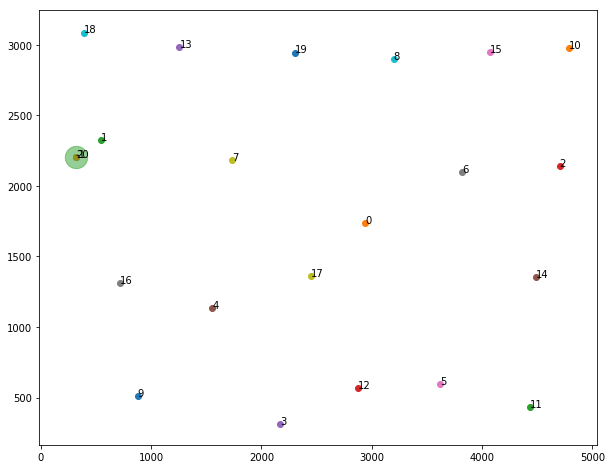

In [27]:
main_centers0 = np.asarray(main_cluster_centers[['center_x', 'center_y']])

center_seq = main_centers0
start_id = cities[cities['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(center_seq)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(10,8))
x = [x[0] for x in center_seq]
y = [y[1] for y in center_seq]

#plt.plot(x,y)
for j in range(len(center_seq)):
    plt.scatter(center_seq[j][0],center_seq[j][1])
    plt.text(center_seq[j][0],center_seq[j][1],j-1)
plt.scatter(start_id['X'], start_id['Y'], s = 500, alpha = 0.5)

In [32]:
main_cluster_seq0 = [1,18,13,7,19,8,15,10,2,6,14,11,5,12,0,17,4,3,9,16]

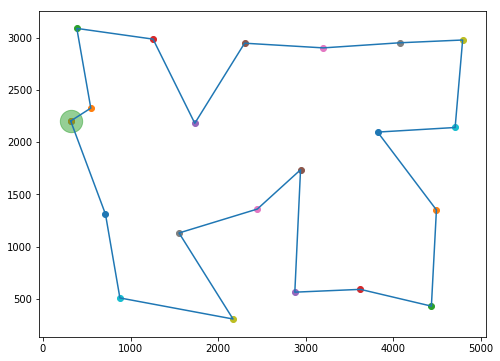

In [33]:
main_centers0 = np.asarray(main_cluster_centers[['center_x', 'center_y']])
#main_cluster_seq0 = generate_main_cluster_path(main_centers0)
center_seq = []
for i in main_cluster_seq0:
    center_seq.append(main_centers0[i])

start_id = cities[cities['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(center_seq)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(8,6))
x = [x[0] for x in center_seq]
y = [y[1] for y in center_seq]

plt.plot(x,y)
for j in range(len(center_seq)):
    plt.scatter(center_seq[j][0],center_seq[j][1])
plt.scatter(start_id['X'], start_id['Y'], s = 500, alpha = 0.5)

In [34]:
main_sequence = pd.DataFrame()
main_sequence['Path'] = main_cluster_seq0
main_sequence.to_csv('main_sequence.csv', index = None)

In [35]:
new_seq = []
for num in range(len(main_cluster_seq0)):
    sub_cluster_seq = sub_cluster_path(sub_cluster_centers0, num, main_cluster_seq0, main_cluster_centers)
    for i in sub_cluster_seq:
        new_seq.append(i)
sub_cluster_sequence0 = new_seq

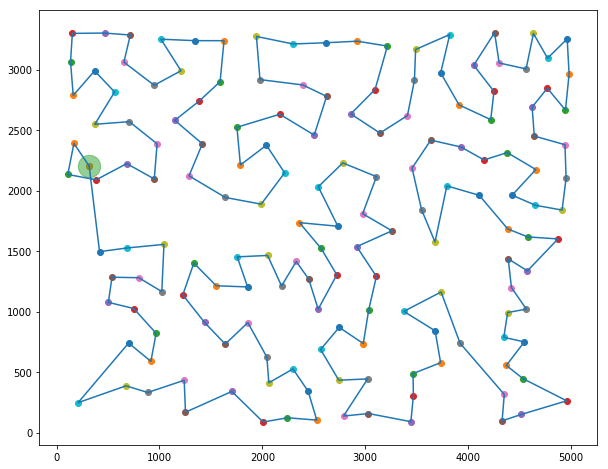

In [38]:
sub_cluster_center_seq0_x = []
sub_cluster_center_seq0_y = []
for i in sub_cluster_sequence0:
    sub_cluster_center_seq0_x.append(np.asarray(sub_cluster_centers0[sub_cluster_centers0['cluster_center']==i]['center_x'])[0])
    sub_cluster_center_seq0_y.append(np.asarray(sub_cluster_centers0[sub_cluster_centers0['cluster_center']==i]['center_y'])[0])

sub_cluster_center_seq0_x = np.asarray(sub_cluster_center_seq0_x).reshape(len(sub_cluster_center_seq0_x),1)
sub_cluster_center_seq0_y = np.asarray(sub_cluster_center_seq0_y).reshape(len(sub_cluster_center_seq0_y),1)
sub_cluster_seq0 = np.concatenate((sub_cluster_center_seq0_x,sub_cluster_center_seq0_y), axis = 1)

start_id = cities[cities['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(sub_cluster_seq0)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(10,8))
x = [x[0] for x in center_seq]
y = [x[1] for x in center_seq]

plt.plot(x,y)
for j in range(len(center_seq)):
    plt.scatter(center_seq[j][0],center_seq[j][1])
plt.scatter(start_id['X'], start_id['Y'], s = 500, alpha = 0.5)

In [39]:
sequence0 = pd.DataFrame()
sequence0['Path'] = sub_cluster_sequence0
sequence0.to_csv('sequence0.csv', index = None)

In [40]:
new_seq = []
for num in range(len(sub_cluster_sequence0)):
    sub_cluster_seq = sub_cluster_path(sub_cluster_centers1, num, sub_cluster_sequence0, sub_cluster_centers0)
    for i in sub_cluster_seq:
        new_seq.append(i)
sub_cluster_sequence1 = new_seq

In [41]:
sequence1 = pd.DataFrame()
sequence1['Path'] = sub_cluster_sequence1
sequence1.to_csv('sequence1.csv', index = None)

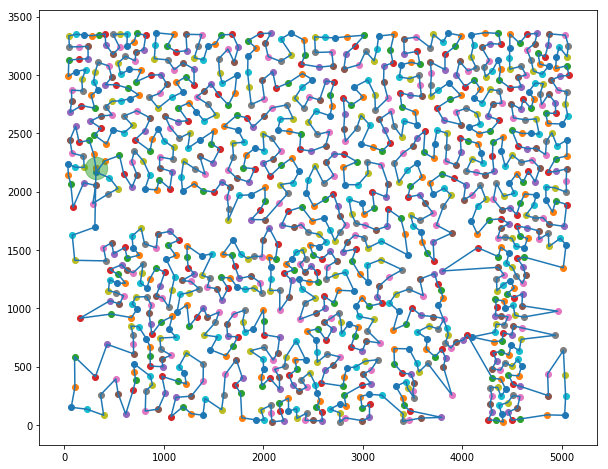

In [42]:
sub_cluster_center_seq1_x = []
sub_cluster_center_seq1_y = []
for i in sub_cluster_sequence1:
    sub_cluster_center_seq1_x.append(np.asarray(sub_cluster_centers1[sub_cluster_centers1['cluster_center']==i]['center_x'])[0])
    sub_cluster_center_seq1_y.append(np.asarray(sub_cluster_centers1[sub_cluster_centers1['cluster_center']==i]['center_y'])[0])

sub_cluster_center_seq1_x = np.asarray(sub_cluster_center_seq1_x).reshape(len(sub_cluster_center_seq1_x),1)
sub_cluster_center_seq1_y = np.asarray(sub_cluster_center_seq1_y).reshape(len(sub_cluster_center_seq1_y),1)
sub_cluster_seq1 = np.concatenate((sub_cluster_center_seq1_x,sub_cluster_center_seq1_y), axis = 1)

start_id = cities[cities['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(sub_cluster_seq1)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(10,8))
x = [x[0] for x in center_seq]
y = [x[1] for x in center_seq]

plt.plot(x,y)
for j in range(len(center_seq)):
    plt.scatter(center_seq[j][0],center_seq[j][1])
plt.scatter(start_id['X'], start_id['Y'], s = 500, alpha = 0.5)

In [43]:
new_seq = []
for num in range(len(sub_cluster_sequence1)):
    print(num)
    sub_cluster_seq = sub_cluster_path(sub_cluster_centers2, num, sub_cluster_sequence1, sub_cluster_centers1)
    for i in sub_cluster_seq:
        new_seq.append(i)
sub_cluster_sequence2 = new_seq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [44]:
sequence2 = pd.DataFrame()
sequence2['Path'] = sub_cluster_sequence2
sequence2.to_csv('sequence2.csv', index = None)

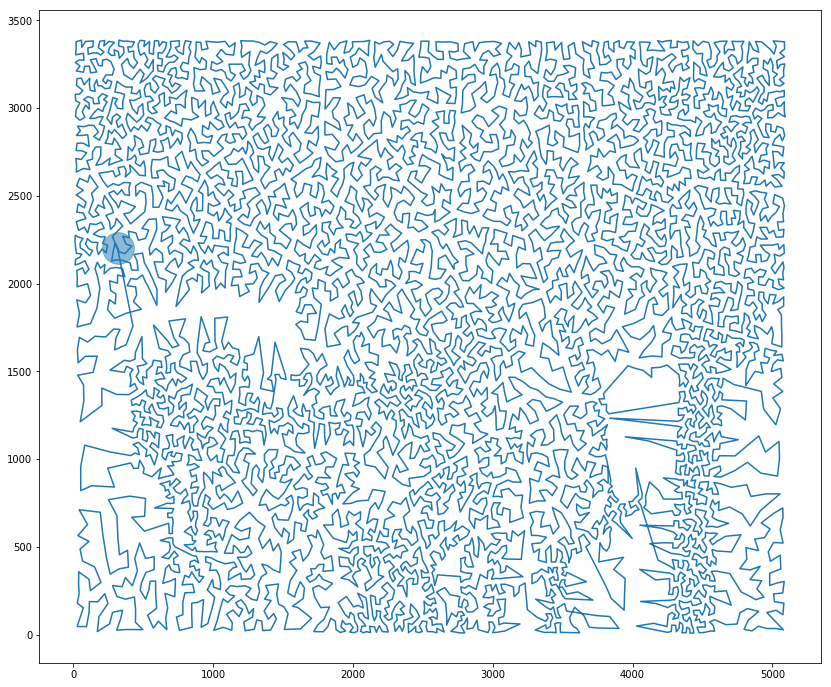

In [45]:
sub_cluster_center_seq2_x = []
sub_cluster_center_seq2_y = []
for i in sub_cluster_sequence2:
    sub_cluster_center_seq2_x.append(np.asarray(sub_cluster_centers2[sub_cluster_centers2['cluster_center']==i]['center_x'])[0])
    sub_cluster_center_seq2_y.append(np.asarray(sub_cluster_centers2[sub_cluster_centers2['cluster_center']==i]['center_y'])[0])

sub_cluster_center_seq2_x = np.asarray(sub_cluster_center_seq2_x).reshape(len(sub_cluster_center_seq2_x),1)
sub_cluster_center_seq2_y = np.asarray(sub_cluster_center_seq2_y).reshape(len(sub_cluster_center_seq2_y),1)
sub_cluster_seq2 = np.concatenate((sub_cluster_center_seq2_x,sub_cluster_center_seq2_y), axis = 1)

start_id = cities[cities['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(sub_cluster_seq2)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(14,12))
x = [x[0] for x in center_seq]
y = [x[1] for x in center_seq]

plt.plot(x,y)
plt.scatter(start_id['X'], start_id['Y'], s = 1000, alpha = 0.5)

In [46]:
new_seq = []
for num in range(len(sub_cluster_sequence2)):
    print(num)
    sub_cluster_seq = sub_cluster_path(sub_cluster_centers3, num, sub_cluster_sequence2, sub_cluster_centers2)
    sub_cluster_seq = np.asarray(sub_cluster_seq).ravel()
    for i in sub_cluster_seq:
        new_seq.append(i)
sub_cluster_sequence3 = new_seq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [47]:
sequence3 = pd.DataFrame()
sequence3['Path'] = sub_cluster_sequence3
sequence3.to_csv('sequence3.csv', index = None)

12025
12021
12023
12022
12020
12024
12050
12054
12051
12053
12052
12055
12003
12004
12001
12005
12002
12000
12031
12034
12032
12033
12030
12035
12014
12011
12010
12015
12012
12013
12043
12045
12042
12040
12044
12041
12063
12065
12062
12064
12061
12060
12260
12265
12262
12263
12264
12261
12202
12201
12205
12200
12203
12204
12223
12221
12222
12224
12220
12225
12212
12210
12215
12214
12213
12211
12250
12253
12255
12251
12254
12252
12242
12245
12240
12241
12244
12243
12231
12233
12234
12230
12235
12232
12630
12635
12632
12633
12631
12634
12615
12613
12611
12614
12610
12612
12651
12654
12652
12650
12653
12655
12624
12622
12621
12625
12620
12623
12665
12662
12660
12661
12664
12663
12645
12644
12642
12640
12641
12643
12605
12602
12603
12600
12604
12601
12403
12405
12400
12404
12402
12401
12433
12430
12434
12431
12432
12435
12414
12410
12413
12412
12415
12411
12454
12451
12455
12452
12453
12450
12465
12463
12461
12462
12460
12464
12424
12422
12420
12423
12421
12425
12444
12440
12441
12445
1244

13542
13540
13544
13543
13541
13524
13521
13522
13525
13523
13520
13505
13502
13500
13503
13501
13504
13533
13531
13535
13532
13534
13530
13562
13560
13565
13564
13561
13563
13515
13512
13511
13514
13513
13510
13553
13551
13555
13552
13550
13554
10004
10000
10001
10003
10002
10005
10045
10043
10044
10042
10041
10040
10022
10021
10024
10020
10023
10025
10011
10013
10015
10010
10014
10012
10052
10051
10055
10053
10050
10054
10030
10034
10032
10035
10033
10031
10065
10063
10060
10064
10061
10062
10221
10223
10225
10220
10222
10224
10214
10213
10215
10210
10211
10212
10243
10240
10244
10242
10241
10245
10231
10235
10233
10230
10234
10232
10254
10250
10253
10252
10251
10255
10262
10261
10263
10265
10260
10264
10204
10200
10203
10201
10202
10205
10653
10652
10651
10654
10655
10650
10600
10601
10604
10602
10605
10603
10621
10625
10624
10622
10620
10623
10660
10662
10665
10661
10664
10663
10612
10615
10610
10613
10611
10614
10631
10634
10632
10635
10633
10630
10642
10643
10640
10644
10645
1064

180505
180525
180520
180522
180523
180521
180524
180533
180530
180535
180531
180534
180532
180515
180510
180513
180512
180511
180514
180555
180550
180554
180552
180551
180553
180365
180361
180362
180364
180360
180363
180353
180350
180355
180351
180352
180354
180302
180303
180305
180300
180301
180304
180322
180321
180324
180325
180320
180323
180341
180344
180340
180343
180345
180342
180310
180313
180314
180311
180312
180315
180334
180330
180335
180333
180332
180331
180002
180005
180000
180004
180001
180003
180062
180063
180064
180061
180065
180060
180040
180042
180043
180044
180041
180045
180035
180031
180032
180034
180030
180033
180024
180023
180021
180022
180025
180020
180011
180014
180013
180015
180010
180012
180053
180052
180051
180054
180055
180050
185612
185613
185614
185615
185610
185611
185621
185625
185622
185620
185623
185624
185600
185603
185601
185605
185602
185604
185633
185635
185631
185634
185632
185630
185665
185663
185664
185661
185660
185662
185651
185654
185655
185650

186400
186405
186403
186454
186451
186453
186452
186455
186450
186432
186434
186431
186433
186435
186430
186460
186464
186461
186465
186462
186463
186355
186351
186354
186353
186350
186352
186323
186325
186320
186322
186324
186321
186344
186341
186345
186343
186342
186340
186313
186314
186310
186315
186311
186312
186362
186365
186363
186360
186364
186361
186335
186330
186333
186331
186334
186332
186301
186305
186303
186302
186300
186304
186020
186022
186024
186023
186021
186025
186053
186052
186051
186055
186054
186050
186005
186004
186002
186001
186003
186000
186064
186060
186061
186063
186065
186062
186042
186044
186040
186045
186043
186041
186010
186015
186012
186014
186011
186013
186033
186031
186034
186032
186030
186035
183203
183201
183204
183205
183202
183200
183263
183260
183262
183264
183261
183265
183233
183231
183235
183232
183230
183234
183245
183241
183242
183243
183240
183244
183211
183213
183210
183214
183212
183215
183253
183251
183255
183252
183250
183254
183224
183223

137024
137020
137025
137022
137023
137040
137045
137041
137043
137044
137042
137061
137064
137065
137060
137062
137063
137032
137030
137034
137033
137031
137035
137003
137000
137001
137004
137002
137005
137052
137053
137050
137055
137051
137054
137010
137013
137014
137011
137012
137015
137442
137444
137440
137441
137445
137443
137405
137404
137401
137403
137400
137402
137433
137435
137432
137430
137434
137431
137453
137451
137454
137452
137450
137455
137465
137461
137462
137464
137460
137463
137410
137415
137412
137413
137411
137414
137421
137423
137424
137420
137422
137425
132320
132323
132322
132321
132325
132324
132333
132334
132331
132335
132332
132330
132354
132355
132351
132352
132350
132353
132302
132304
132301
132300
132305
132303
132310
132312
132315
132311
132314
132313
132340
132342
132343
132344
132341
132345
132360
132363
132362
132364
132361
132365
132661
132663
132665
132660
132664
132662
132605
132602
132603
132600
132604
132601
132644
132640
132642
132645
132643
132641

136625
136615
136613
136610
136612
136611
136614
136665
136663
136660
136662
136664
136661
136631
136635
136632
136630
136633
136634
136642
136643
136641
136645
136640
136644
136603
136601
136602
136605
136600
136604
136655
136650
136652
136651
136654
136653
135451
135454
135450
135455
135452
135453
135425
135423
135421
135424
135420
135422
135442
135441
135443
135444
135440
135445
135415
135412
135413
135411
135410
135414
135430
135433
135435
135431
135434
135432
135462
135463
135464
135461
135460
135465
135404
135402
135401
135400
135403
135405
135201
135202
135204
135200
135205
135203
135250
135251
135255
135254
135252
135253
135240
135245
135243
135241
135244
135242
135213
135215
135210
135211
135214
135212
135231
135234
135233
135230
135235
135232
135223
135225
135222
135220
135221
135224
135260
135264
135261
135262
135265
135263
135315
135312
135311
135313
135314
135310
135302
135305
135303
135301
135304
135300
135321
135323
135322
135325
135320
135324
135351
135353
135355
135354

70541
70545
70543
70540
70544
70535
70530
70533
70531
70534
70532
70502
70500
70504
70503
70501
70505
70555
70550
70553
70552
70551
70554
70334
70331
70335
70330
70333
70332
70360
70364
70362
70365
70361
70363
70310
70315
70311
70313
70314
70312
70305
70301
70303
70300
70304
70302
70344
70340
70343
70341
70345
70342
70320
70322
70324
70325
70321
70323
70355
70351
70353
70350
70354
70352
70100
70105
70102
70104
70101
70103
70154
70152
70151
70153
70150
70155
70120
70123
70121
70122
70125
70124
70141
70143
70145
70140
70142
70144
70161
70163
70165
70160
70162
70164
70130
70135
70132
70134
70131
70133
70114
70112
70115
70111
70113
70110
70633
70630
70632
70634
70635
70631
70614
70615
70613
70610
70612
70611
70653
70652
70654
70655
70651
70650
70662
70665
70663
70661
70664
70660
70603
70604
70601
70605
70600
70602
70642
70640
70645
70641
70644
70643
70623
70625
70622
70621
70624
70620
70035
70030
70034
70033
70031
70032
70004
70001
70003
70000
70005
70002
70060
70064
70061
70065
70063
7006

75543
75544
75540
75545
75542
75533
75535
75532
75534
75530
75531
75502
75505
75503
75500
75504
75501
75553
75550
75555
75551
75554
75552
75451
75455
75453
75452
75454
75450
75401
75405
75403
75400
75402
75404
75462
75464
75463
75460
75465
75461
75420
75424
75425
75422
75423
75421
75441
75444
75442
75443
75440
75445
75413
75410
75412
75411
75414
75415
75434
75430
75435
75432
75433
75431
75360
75365
75363
75361
75364
75362
75301
75303
75300
75305
75302
75304
75341
75343
75344
75340
75345
75342
75334
75333
75330
75331
75335
75332
75354
75352
75351
75355
75353
75350
75313
75310
75312
75314
75315
75311
75322
75325
75321
75324
75320
75323
75251
75255
75250
75254
75253
75252
75210
75213
75214
75212
75215
75211
75263
75265
75262
75260
75264
75261
75231
75235
75232
75230
75234
75233
75242
75243
75244
75240
75241
75245
75221
75222
75220
75224
75223
75225
75200
75201
75203
75205
75202
75204
75632
75631
75635
75633
75630
75634
75613
75611
75615
75614
75612
75610
75643
75645
75640
75644
75642
7564

192620
192623
192624
192621
192014
192010
192011
192012
192013
192015
192042
192040
192044
192043
192041
192045
192061
192063
192062
192060
192064
192065
192003
192002
192001
192004
192000
192005
192035
192034
192030
192032
192031
192033
192023
192024
192025
192021
192022
192020
192051
192055
192050
192053
192054
192052
192254
192253
192251
192250
192255
192252
192234
192230
192235
192232
192231
192233
192222
192221
192225
192223
192220
192224
192204
192201
192203
192202
192205
192200
192264
192261
192263
192265
192260
192262
192244
192242
192245
192241
192240
192243
192213
192212
192210
192215
192214
192211
192510
192515
192511
192512
192514
192513
192565
192563
192560
192564
192562
192561
192535
192530
192532
192534
192531
192533
192553
192550
192554
192555
192552
192551
192520
192523
192524
192522
192521
192525
192542
192540
192545
192543
192541
192544
192503
192505
192500
192502
192504
192501
197613
197611
197615
197610
197614
197612
197651
197652
197655
197650
197654
197653
197644

195215
195212
195214
195213
195022
195021
195024
195020
195025
195023
195030
195034
195032
195035
195031
195033
195003
195002
195005
195000
195001
195004
195054
195051
195055
195052
195053
195050
195045
195044
195041
195043
195042
195040
195063
195061
195064
195065
195062
195060
195015
195012
195014
195011
195013
195010
195624
195621
195625
195622
195620
195623
195663
195660
195664
195665
195661
195662
195632
195633
195631
195630
195635
195634
195611
195613
195612
195614
195610
195615
195642
195641
195643
195644
195645
195640
195653
195650
195652
195655
195654
195651
195605
195602
195604
195600
195603
195601
85240
85243
85245
85241
85244
85242
85200
85205
85203
85201
85204
85202
85252
85250
85253
85254
85251
85255
85224
85220
85225
85222
85221
85223
85261
85262
85265
85260
85264
85263
85235
85233
85230
85234
85231
85232
85212
85210
85215
85213
85211
85214
85630
85634
85632
85631
85635
85633
85644
85640
85643
85642
85641
85645
85604
85605
85601
85600
85603
85602
85625
85622
85621
85623


84043
84044
84040
84042
84045
84020
84024
84021
84022
84023
84025
84013
84011
84012
84014
84010
84015
84615
84611
84613
84612
84610
84614
84640
84643
84645
84642
84644
84641
84601
84602
84604
84600
84603
84605
84623
84620
84625
84624
84622
84621
84630
84634
84632
84633
84631
84635
84653
84655
84651
84652
84650
84654
84664
84661
84663
84660
84665
84662
84445
84440
84442
84443
84444
84441
84432
84434
84431
84433
84430
84435
84465
84463
84460
84464
84462
84461
84404
84400
84401
84405
84402
84403
84420
84423
84425
84421
84424
84422
84452
84451
84453
84450
84455
84454
84410
84413
84411
84414
84412
84415
84303
84305
84300
84302
84304
84301
84352
84355
84353
84351
84354
84350
84333
84331
84334
84335
84332
84330
84313
84312
84315
84311
84314
84310
84362
84360
84363
84365
84361
84364
84342
84340
84344
84341
84343
84345
84321
84323
84320
84324
84322
84325
84155
84152
84154
84150
84151
84153
84114
84112
84111
84115
84110
84113
84163
84160
84165
84162
84164
84161
84140
84142
84143
84144
84145
8414

154440
154445
154441
154442
154443
154444
154410
154412
154414
154411
154415
154413
154455
154452
154450
154454
154451
154453
154113
154110
154112
154114
154111
154115
154143
154140
154144
154142
154141
154145
154122
154124
154120
154123
154121
154125
154153
154151
154155
154152
154150
154154
154131
154133
154130
154134
154132
154135
154105
154101
154100
154103
154102
154104
154163
154160
154165
154162
154161
154164
154054
154050
154052
154055
154053
154051
154042
154044
154041
154045
154043
154040
154013
154012
154015
154010
154011
154014
154061
154063
154065
154062
154060
154064
154003
154004
154001
154000
154005
154002
154032
154030
154034
154035
154031
154033
154025
154021
154024
154022
154023
154020
154632
154631
154635
154630
154634
154633
154661
154663
154660
154664
154665
154662
154613
154611
154615
154612
154614
154610
154623
154622
154621
154620
154625
154624
154654
154650
154652
154653
154651
154655
154604
154600
154605
154602
154603
154601
154643
154640
154644
154645
154642

151421
151425
151444
151440
151445
151441
151442
151443
151510
151514
151512
151511
151513
151515
151523
151521
151522
151525
151524
151520
151543
151541
151545
151542
151544
151540
151564
151561
151560
151565
151562
151563
151503
151502
151505
151501
151500
151504
151551
151553
151554
151550
151555
151552
151530
151532
151534
151533
151531
151535
151134
151130
151133
151132
151131
151135
151111
151114
151115
151113
151110
151112
151121
151123
151124
151122
151125
151120
151150
151154
151151
151152
151155
151153
151165
151161
151164
151162
151160
151163
151104
151102
151101
151105
151103
151100
151141
151142
151145
151140
151144
151143
151660
151665
151662
151663
151661
151664
151634
151631
151632
151635
151630
151633
151643
151641
151645
151640
151644
151642
151651
151654
151655
151650
151652
151653
151615
151611
151613
151614
151610
151612
151623
151624
151620
151621
151622
151625
151604
151602
151600
151605
151603
151601
151363
151361
151364
151365
151362
151360
151321
151325
151323

103153
103155
103110
103113
103111
103115
103112
103114
103145
103140
103142
103143
103141
103144
103133
103131
103134
103132
103135
103130
103105
103102
103101
103103
103100
103104
103165
103163
103160
103161
103164
103162
103401
103402
103405
103403
103400
103404
103422
103425
103421
103423
103424
103420
103435
103434
103433
103431
103430
103432
103442
103440
103445
103441
103444
103443
103413
103415
103411
103414
103412
103410
103461
103463
103465
103460
103464
103462
103452
103455
103451
103454
103450
103453
103034
103033
103031
103035
103032
103030
103002
103000
103003
103004
103001
103005
103062
103063
103061
103064
103065
103060
103045
103040
103042
103043
103044
103041
103024
103021
103025
103022
103023
103020
103010
103014
103011
103015
103012
103013
103054
103053
103051
103052
103055
103050
103545
103543
103540
103542
103544
103541
103535
103531
103533
103534
103530
103532
103514
103511
103513
103510
103512
103515
103553
103551
103555
103552
103554
103550
103520
103525
103522

105260
105263
105264
105214
105211
105215
105212
105213
105210
105245
105242
105244
105240
105243
105241
105455
105453
105452
105450
105451
105454
105433
105431
105434
105432
105430
105435
105415
105414
105411
105412
105413
105410
105444
105445
105443
105440
105442
105441
105425
105420
105422
105424
105421
105423
105464
105460
105462
105465
105461
105463
105400
105404
105401
105403
105402
105405
105130
105135
105131
105134
105132
105133
105113
105110
105112
105115
105111
105114
105152
105153
105151
105155
105154
105150
105162
105164
105160
105163
105165
105161
105124
105122
105120
105123
105125
105121
105104
105101
105103
105102
105100
105105
105141
105143
105140
105145
105144
105142
105363
105361
105362
105364
105360
105365
105305
105300
105304
105301
105303
105302
105345
105341
105344
105342
105343
105340
105322
105324
105320
105323
105325
105321
105353
105351
105354
105355
105352
105350
105312
105313
105315
105311
105310
105314
105332
105331
105334
105333
105330
105335
107355
107353

24643
24642
24640
24624
24622
24625
24620
24623
24621
24633
24634
24630
24635
24632
24631
24602
24604
24600
24603
24601
24605
24661
24664
24663
24665
24660
24662
20444
20442
20445
20441
20443
20440
20413
20412
20414
20410
20415
20411
20450
20454
20455
20453
20451
20452
20421
20423
20420
20422
20425
20424
20465
20462
20460
20461
20463
20464
20400
20402
20403
20405
20401
20404
20431
20434
20433
20435
20430
20432
20322
20323
20321
20324
20320
20325
20345
20340
20342
20344
20341
20343
20302
20304
20301
20305
20303
20300
20362
20365
20361
20363
20364
20360
20353
20351
20350
20354
20355
20352
20332
20330
20334
20335
20331
20333
20314
20313
20310
20315
20311
20312
20123
20122
20121
20125
20124
20120
20165
20164
20161
20163
20162
20160
20101
20100
20103
20104
20102
20105
20112
20113
20114
20110
20111
20115
20131
20133
20132
20134
20130
20135
20154
20153
20151
20150
20152
20155
20144
20140
20142
20141
20145
20143
20530
20534
20535
20532
20531
20533
20512
20510
20514
20515
20511
20513
20544
2054

22612
22613
22615
22611
22614
22633
22631
22632
22635
22634
22630
22651
22650
22652
22655
22653
22654
22664
22660
22663
22665
22661
22662
22243
22240
22245
22242
22241
22244
22253
22252
22254
22251
22250
22255
22200
22202
22204
22203
22205
22201
22223
22221
22220
22225
22222
22224
22234
22232
22235
22230
22233
22231
22261
22264
22265
22260
22262
22263
22211
22215
22212
22213
22214
22210
22522
22524
22520
22523
22525
22521
22542
22543
22541
22545
22540
22544
22501
22503
22500
22504
22505
22502
22561
22563
22562
22565
22560
22564
22532
22533
22530
22534
22531
22535
22513
22511
22514
22512
22515
22510
22553
22555
22552
22554
22551
22550
27002
27003
27004
27001
27005
27000
27041
27043
27044
27040
27042
27045
27020
27024
27023
27022
27021
27025
27011
27012
27014
27015
27010
27013
27063
27060
27065
27064
27062
27061
27053
27050
27054
27052
27055
27051
27034
27035
27032
27031
27033
27030
27344
27340
27343
27345
27341
27342
27303
27301
27305
27302
27304
27300
27330
27335
27333
27331
27334
2733

65141
65142
65145
65140
65143
65154
65152
65151
65150
65155
65153
65100
65105
65102
65104
65103
65101
65453
65452
65450
65454
65451
65455
65441
65443
65445
65440
65444
65442
65461
65464
65460
65462
65463
65465
65422
65424
65421
65420
65423
65425
65433
65430
65434
65435
65431
65432
65415
65410
65412
65413
65411
65414
65401
65403
65402
65404
65405
65400
65342
65345
65340
65344
65341
65343
65350
65352
65354
65353
65355
65351
65361
65363
65365
65360
65364
65362
65302
65300
65304
65301
65305
65303
65330
65333
65334
65331
65332
65335
65310
65315
65311
65313
65314
65312
65322
65324
65320
65321
65323
65325
65003
65000
65005
65002
65001
65004
65065
65062
65064
65061
65060
65063
65051
65050
65055
65053
65052
65054
65033
65031
65034
65030
65032
65035
65041
65040
65042
65045
65043
65044
65023
65021
65024
65025
65020
65022
65011
65015
65012
65010
65014
65013
61451
61452
61455
61454
61450
61453
61411
61413
61410
61415
61412
61414
61430
61434
61432
61433
61431
61435
61460
61464
61461
61462
61463
6146

142135
142131
142134
142154
142152
142150
142153
142151
142155
142122
142120
142125
142123
142121
142124
142101
142104
142103
142100
142105
142102
142113
142111
142115
142112
142114
142110
142140
142141
142145
142143
142142
142144
142324
142320
142323
142322
142325
142321
142353
142355
142351
142352
142354
142350
142315
142314
142310
142313
142312
142311
142335
142332
142334
142331
142333
142330
142300
142302
142303
142305
142301
142304
142365
142364
142362
142360
142361
142363
142343
142342
142340
142345
142341
142344
142054
142050
142053
142055
142052
142051
142015
142013
142012
142014
142010
142011
142060
142065
142062
142063
142061
142064
142000
142001
142004
142002
142003
142031
142032
142035
142030
142033
142034
142042
142044
142045
142041
142043
142040
142021
142024
142023
142025
142022
142020
142502
142505
142504
142501
142500
142503
142554
142552
142551
142555
142553
142550
142514
142511
142512
142515
142510
142513
142535
142530
142532
142534
142531
142533
142541
142544
142542

140562
140564
140505
140503
140500
140504
140502
140501
140551
140553
140550
140554
140555
140552
140521
140524
140525
140520
140523
140522
140544
140543
140541
140545
140542
140540
140515
140512
140513
140510
140514
140511
140532
140533
140534
140530
140535
140531
140365
140364
140363
140361
140362
140360
140322
140320
140323
140325
140321
140324
140350
140354
140352
140351
140355
140353
140331
140332
140334
140330
140335
140333
140304
140303
140301
140305
140300
140302
140340
140345
140344
140343
140341
140342
140310
140134
140130
140135
140131
140133
140132
140150
140152
140154
140151
140153
140155
140124
140121
140122
140123
140125
140120
140100
140103
140104
140102
140101
140105
140144
140141
140145
140143
140142
140140
140162
140164
140161
140165
140160
140163
140112
140111
140115
140110
140114
140113
140651
140650
140654
140652
140653
140655
140643
140641
140645
140640
140644
140642
140615
140612
140613
140611
140614
140610
140624
140620
140625
140623
140622
140621
140600
140605

110660
110601
110600
110641
110640
110642
110613
110611
110612
110610
110620
110621
110650
110630
110051
110050
110052
110040
110043
110042
110045
110044
110041
110011
110013
110012
110015
110010
110014
110061
110063
110062
110064
110060
110065
110030
110034
110032
110033
110035
110031
110024
110020
110025
110021
110023
110022
110003
110002
110001
110004
110000
110005
110432
110434
110431
110433
110435
110430
110463
110462
110464
110465
110461
110460
110450
110451
110452
110440
110442
110443
110445
110441
110444
110412
110414
110410
110415
110411
110413
110403
110400
110404
110402
110405
110401
110420
110424
110423
110421
110425
110422
110320
110322
110321
110323
110325
110324
110353
110350
110355
110351
110352
110354
110315
110314
110311
110313
110310
110312
110331
110332
110330
110333
110335
110334
110301
110304
110302
110305
110303
110300
110341
110343
110340
110345
110344
110342
110362
110365
110360
110363
110364
110361
113441
113443
113445
113440
113444
113442
113461
113462
113464

115024
115023
115021
115022
115025
115610
115615
115613
115612
115611
115614
115651
115653
115650
115654
115652
115655
115633
115634
115630
115631
115635
115632
115661
115660
115623
115624
115621
115622
115620
115640
115645
115642
115641
115643
115644
115604
115602
115600
115601
115603
115605
115224
115220
115222
115225
115221
115223
115203
115204
115202
115205
115201
115200
115215
115210
115213
115212
115214
115211
115255
115252
115250
115253
115254
115251
115264
115265
115261
115262
115263
115260
115232
115235
115230
115234
115231
115233
115240
115244
115242
115241
115245
115243
115162
115165
115161
115163
115164
115160
115124
115122
115121
115120
115123
115125
115114
115111
115115
115112
115110
115113
115141
115140
115131
115130
115155
115150
115152
115153
115151
115154
115102
115104
115101
115100
115103
115105
111412
111414
111411
111413
111410
111415
111431
111435
111432
111434
111430
111433
111451
111455
111450
111454
111453
111452
111400
111404
111401
111402
111405
111403
111464

55401
55405
55463
55465
55461
55464
55460
55462
55430
55434
55435
55432
55431
55433
55332
55331
55335
55333
55330
55334
55313
55311
55314
55310
55312
55315
55355
55352
55350
55353
55354
55351
55304
55302
55300
55305
55301
55303
55321
55322
55323
55320
55325
55324
55340
55341
55344
55345
55342
55343
55360
55363
55365
55364
55361
55362
55522
55523
55524
55521
55525
55520
55531
55530
55533
55532
55534
55535
55500
55503
55502
55505
55501
55504
55554
55550
55553
55551
55555
55552
55513
55515
55511
55512
55510
55514
55561
55565
55562
55563
55564
55560
55544
55545
55541
55542
55543
55540
55260
55263
55262
55264
55261
55265
55244
55240
55243
55241
55245
55242
55215
55212
55211
55214
55213
55210
55252
55254
55250
55253
55255
55251
55204
55202
55203
55201
55205
55200
55224
55221
55225
55222
55223
55220
55233
55235
55231
55234
55232
55230
55114
55110
55115
55113
55112
55111
55162
55164
55161
55160
55165
55163
55134
55131
55135
55132
55130
55133
55104
55102
55105
55100
55101
55103
55150
55153
5515

126324
126351
126353
126352
126350
126332
126330
126334
126335
126333
126331
126344
126341
126343
126340
126345
126342
126154
126151
126150
126155
126152
126153
126120
126123
126122
126124
126121
126125
126133
126130
126134
126131
126132
126135
126114
126113
126110
126112
126115
126111
126164
126163
126161
126162
126160
126165
126144
126140
126143
126145
126141
126142
126104
126100
126103
126105
126102
126101
121154
121151
121155
121153
121150
121152
121131
121132
121135
121130
121133
121134
121101
121103
121100
121102
121105
121104
121140
121143
121142
121144
121141
121145
121164
121162
121165
121160
121161
121163
121111
121115
121110
121113
121114
121112
121123
121121
121125
121124
121122
121120
121420
121423
121422
121424
121425
121421
121445
121440
121443
121441
121442
121444
121412
121410
121414
121413
121415
121411
121451
121453
121450
121455
121452
121454
121403
121405
121401
121402
121404
121400
121430
121435
121431
121433
121432
121434
121464
121462
121465
121460
121463
121461

127222
127224
127200
127205
127201
127203
127202
127204
122240
122243
122245
122241
122244
122242
122224
122223
122221
122222
122225
122220
122214
122210
122212
122215
122211
122213
122253
122255
122251
122250
122254
122252
122231
122235
122233
122230
122232
122234
122265
122262
122261
122264
122260
122263
122200
122203
122201
122204
122202
122205
122543
122542
122541
122544
122545
122540
122563
122562
122560
122561
122564
122565
122510
122515
122512
122511
122514
122513
122535
122533
122530
122531
122534
122532
122501
122503
122505
122502
122500
122504
122552
122554
122550
122553
122551
122555
122525
122523
122521
122524
122520
122522
122163
122165
122160
122162
122161
122164
122123
122124
122120
122125
122121
122122
122101
122104
122102
122100
122105
122103
122111
122113
122115
122112
122110
122114
122140
122144
122143
122141
122145
122142
122155
122150
122153
122154
122151
122152
122133
122135
122130
122131
122132
122134
122045
122042
122040
122043
122041
122044
122052
122051
122055

1244
1245
1263
1261
1260
1262
1264
1265
1234
1235
1231
1230
1232
1233
1201
1204
1202
1200
1205
1203
1623
1622
1621
1620
1624
1625
1662
1665
1663
1660
1664
1661
1605
1601
1604
1600
1602
1603
1634
1630
1635
1633
1631
1632
1610
1614
1611
1612
1613
1615
1644
1642
1641
1645
1643
1640
1650
1654
1651
1653
1652
1655
1001
1003
1002
1004
1000
1005
1053
1055
1050
1054
1051
1052
1060
1061
1063
1065
1062
1064
1020
1024
1023
1022
1021
1025
1042
1043
1040
1044
1045
1041
1013
1010
1014
1011
1015
1012
1035
1032
1033
1030
1031
1034
1322
1320
1323
1324
1325
1321
1344
1342
1341
1343
1340
1345
1363
1365
1361
1364
1362
1360
1302
1305
1301
1300
1303
1304
1333
1331
1335
1330
1332
1334
1352
1350
1355
1351
1353
1354
1312
1314
1310
1313
1315
1311
3110
3113
3114
3112
3111
3115
3144
3141
3143
3142
3140
3145
3103
3104
3101
3100
3102
3105
3152
3155
3150
3153
3151
3154
3132
3133
3130
3135
3131
3134
3163
3162
3160
3165
3161
3164
3120
3124
3123
3121
3122
3125
3332
3335
3330
3331
3333
3334
3303
3305
3302
3301
3300
3304


7615
7611
7612
7310
7314
7313
7315
7311
7312
7344
7342
7340
7345
7341
7343
7353
7351
7355
7350
7354
7352
7320
7324
7322
7325
7321
7323
7363
7360
7362
7365
7364
7361
7302
7303
7305
7301
7300
7304
7331
7333
7334
7332
7330
7335
7504
7500
7503
7505
7502
7501
7553
7550
7554
7552
7555
7551
7545
7543
7541
7542
7540
7544
7514
7515
7513
7510
7512
7511
7532
7534
7533
7531
7530
7535
7560
7562
7565
7561
7564
7563
7521
7523
7525
7524
7522
7520
173442
173444
173441
173445
173443
173440
173433
173432
173431
173435
173434
173430
173413
173410
173415
173411
173414
173412
173453
173455
173454
173452
173451
173450
173422
173420
173421
173424
173423
173425
173402
173405
173400
173403
173401
173404
173464
173460
173461
173465
173462
173463
173513
173511
173514
173515
173512
173510
173542
173543
173545
173540
173544
173541
173525
173520
173521
173523
173522
173524
173551
173555
173553
173550
173552
173554
173500
173505
173504
173503
173501
173502
173561
173562
173563
173564
173560
173565
173534
173531
17353

177305
177304
177351
177352
177355
177350
177354
177353
177662
177665
177660
177663
177664
177661
177640
177644
177642
177641
177645
177643
177623
177624
177621
177625
177622
177620
177651
177655
177650
177654
177652
177653
177602
177600
177603
177605
177604
177601
177633
177632
177635
177631
177634
177630
177615
177614
177611
177613
177610
177612
177430
177434
177433
177431
177432
177435
177451
177454
177452
177455
177450
177453
177414
177410
177413
177412
177415
177411
177440
177444
177442
177445
177441
177443
177405
177403
177400
177404
177401
177402
177464
177461
177463
177465
177462
177460
177421
177425
177424
177422
177423
177420
177243
177242
177241
177244
177245
177240
177232
177234
177230
177231
177235
177233
177215
177210
177214
177212
177213
177211
177263
177261
177265
177260
177264
177262
177224
177222
177221
177225
177223
177220
177255
177253
177251
177254
177252
177250
177202
177205
177204
177201
177203
177200
177041
177040
177043
177045
177042
177044
177020
177021
177022

47541
47545
47540
47543
47565
47562
47561
47563
47560
47564
47514
47513
47512
47515
47510
47511
47535
47531
47533
47534
47532
47530
47551
47555
47552
47553
47550
47554
47520
47524
47523
47522
47525
47521
47503
47505
47500
47501
47504
47502
47000
47002
47005
47003
47004
47001
47024
47022
47021
47025
47020
47023
47060
47063
47064
47061
47065
47062
47040
47044
47045
47042
47043
47041
47013
47011
47014
47012
47010
47050
47054
47053
47051
47055
47052
47034
47031
47033
47032
47035
47030
40300
40303
40305
40304
40301
40302
40323
40321
40325
40324
40322
40320
40313
40315
40310
40311
40312
40314
40355
40351
40353
40352
40354
40350
40332
40330
40334
40333
40335
40331
40365
40363
40361
40362
40364
40360
40341
40342
40343
40345
40344
40340
40104
40103
40100
40105
40101
40102
40150
40152
40155
40153
40151
40154
40114
40111
40113
40112
40110
40115
40130
40133
40135
40134
40131
40132
40163
40165
40161
40164
40162
40160
40140
40143
40142
40145
40141
40144
40123
40120
40122
40124
40121
40125
40240
4024

42411
42414
42413
42410
42420
42423
42421
42424
42422
42425
42515
42510
42512
42513
42511
42514
42540
42545
42542
42541
42544
42543
42525
42520
42524
42523
42521
42522
42534
42530
42533
42535
42531
42532
42503
42501
42505
42500
42504
42502
42554
42550
42553
42555
42552
42551
42563
42562
42564
42565
42560
42561
42113
42110
42114
42115
42112
42111
42133
42131
42130
42134
42132
42135
42150
42154
42152
42155
42151
42153
42104
42100
42103
42101
42105
42102
42163
42161
42165
42162
42164
42160
42121
42124
42123
42120
42125
42122
42141
42143
42145
42144
42142
42140
42215
42210
42212
42213
42211
42214
42245
42241
42243
42240
42244
42242
42225
42222
42221
42223
42224
42220
42253
42250
42254
42255
42252
42251
42234
42233
42231
42232
42235
42230
42204
42200
42205
42201
42202
42203
42264
42262
42263
42260
42265
42261
43663
43664
43661
43662
43660
43665
43644
43645
43640
43643
43641
43642
43653
43652
43655
43651
43654
43650
43613
43610
43614
43615
43612
43611
43634
43630
43633
43631
43635
43632
4360

30113
30111
30114
30110
30115
30130
30135
30132
30131
30133
30134
30163
30162
30165
30161
30164
30160
30140
30143
30144
30142
30141
30145
30102
30105
30101
30103
30100
30104
30124
30125
30123
30121
30122
30120
30154
30151
30153
30152
30155
30150
30552
30550
30554
30555
30551
30553
30510
30515
30513
30511
30512
30514
30542
30541
30544
30540
30543
30545
30562
30561
30563
30564
30565
30560
30532
30535
30530
30534
30533
30531
30525
30520
30524
30521
30523
30522
30501
30504
30502
30505
30500
30503
30045
30041
30044
30043
30040
30042
30000
30002
30004
30001
30005
30003
30060
30065
30062
30061
30064
30063
30021
30025
30020
30022
30023
30024
30011
30014
30012
30010
30015
30013
30054
30052
30053
30050
30051
30055
30032
30031
30034
30033
30030
30035
30413
30412
30411
30414
30415
30410
30431
30434
30435
30433
30430
30432
30403
30401
30405
30400
30404
30402
30425
30422
30424
30421
30423
30420
30441
30444
30442
30445
30440
30443
30464
30462
30460
30463
30461
30465
30450
30452
30454
30453
30451
3045

33653
33650
33642
33643
33644
33645
33640
33641
33635
33630
33633
33631
33634
33632
33610
33614
33612
33615
33611
33613
33621
33624
33620
33623
33625
33622
33663
33662
33664
33660
33665
33661
33212
33213
33214
33211
33215
33210
33255
33250
33252
33253
33254
33251
33243
33241
33244
33245
33242
33240
33223
33224
33220
33221
33222
33225
33201
33204
33203
33205
33200
33202
33234
33235
33230
33232
33233
33231
33262
33264
33260
33263
33265
33261
33542
33545
33540
33544
33543
33541
33524
33521
33522
33525
33523
33520
33563
33560
33562
33564
33565
33561
33504
33501
33502
33505
33500
33503
33555
33553
33551
33554
33550
33552
33512
33515
33511
33514
33513
33510
33534
33531
33533
33535
33532
33530
33120
33123
33125
33121
33124
33122
33151
33153
33154
33150
33155
33152
33144
33141
33140
33142
33143
33161
33162
33160
33163
33110
33113
33111
33114
33112
33115
33101
33104
33103
33102
33100
33130
33133
33135
33131
33134
33132
33300
33301
33305
33303
33302
33304
33353
33352
33355
33350
33351
33354
3334

93515
93512
93514
93510
93505
93503
93500
93501
93502
93504
93564
93563
93561
93565
93562
93560
93522
93525
93520
93524
93523
93521
93542
93544
93540
93541
93543
93545
93531
93534
93532
93533
93530
93535
93554
93552
93551
93553
93550
93555
93021
93023
93024
93025
93020
93022
93063
93061
93062
93060
93064
93004
93000
93005
93001
93003
93002
93045
93041
93042
93043
93040
93044
93011
93012
93015
93010
93013
93014
93054
93050
93053
93052
93051
93055
93031
93032
93034
93030
93033
93442
93440
93441
93411
93412
93414
93410
93413
93450
93453
93452
93451
93454
93462
93463
93461
93460
93420
93421
93422
93400
93401
93430
93431
93433
93432
93332
93335
93330
93333
93334
93331
93323
93322
93320
93325
93324
93321
93314
93315
93313
93312
93310
93311
93361
93364
93363
93362
93360
93341
93340
93351
93350
93352
93301
93302
93300
95510
95550
95540
95560
95500
95520
95531
95530
95451
95450
95452
95465
95463
95460
95464
95462
95461
95441
95444
95443
95445
95440
95442
95411
95415
95412
95414
95410
95413
9543

161341
161360
161364
161361
161363
161365
161362
161332
161334
161333
161331
161330
161335
161312
161315
161311
161313
161314
161310
161351
161353
161355
161350
161354
161352
161302
161300
161303
161304
161305
161301
161263
161265
161261
161260
161262
161264
161215
161213
161211
161212
161214
161210
161244
161243
161241
161240
161242
161245
161224
161225
161222
161220
161223
161221
161234
161231
161235
161233
161230
161232
161250
161255
161252
161254
161251
161253
161200
161204
161202
161201
161205
161203
161653
161650
161652
161654
161655
161651
161601
161602
161600
161604
161603
161605
161645
161640
161642
161644
161643
161641
161611
161612
161614
161615
161613
161610
161634
161630
161631
161633
161635
161632
161663
161661
161662
161665
161664
161660
161623
161621
161625
161624
161622
161620
161145
161143
161140
161142
161144
161141
161161
161164
161162
161160
161165
161163
161124
161121
161125
161123
161120
161122
161132
161130
161134
161131
161135
161133
161101
161103
161105
161100

164404
164401
164403
164402
164405
164442
164444
164440
164445
164443
164441
164054
164051
164053
164055
164050
164052
164020
164023
164025
164022
164021
164024
164060
164064
164062
164061
164063
164065
164031
164035
164034
164030
164032
164033
164013
164010
164014
164012
164011
164015
164001
164003
164005
164002
164000
164004
164045
164041
164043
164040
164042
164044
164323
164325
164320
164324
164322
164321
164362
164364
164360
164363
164361
164365
164340
164343
164345
164342
164341
164344
164302
164301
164303
164300
164351
164350
164352
164333
164331
164330
164334
164335
164332
164311
164314
164312
164313
164315
164310
164145
164142
164141
164143
164144
164140
164104
164101
164102
164103
164100
164105
164121
164124
164122
164123
164125
164120
164133
164130
164135
164131
164134
164132
164161
164163
164162
164160
164113
164115
164110
164112
164114
164111
164153
164151
164150
164155
164154
164152
164623
164622
164620
164625
164624
164621
164613
164612
164610
164615
164611
164614
164661

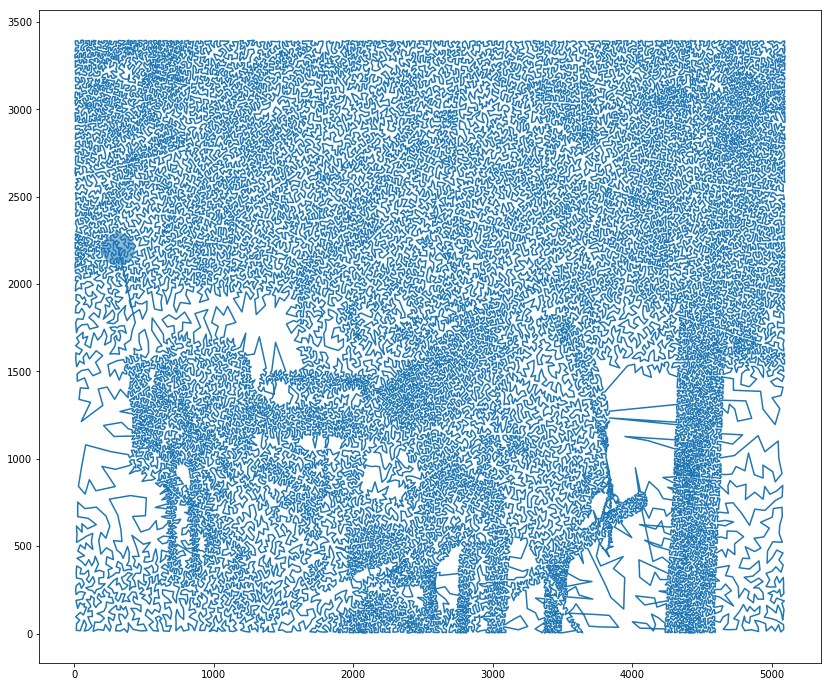

In [48]:
sub_cluster_center_seq3_x = []
sub_cluster_center_seq3_y = []
for i in sub_cluster_sequence3:
    print(i)
    sub_cluster_center_seq3_x.append(np.asarray(sub_cluster_centers3[sub_cluster_centers3['cluster_center']==i]['center_x'])[0])
    sub_cluster_center_seq3_y.append(np.asarray(sub_cluster_centers3[sub_cluster_centers3['cluster_center']==i]['center_y'])[0])

sub_cluster_center_seq3_x = np.asarray(sub_cluster_center_seq3_x).reshape(len(sub_cluster_center_seq3_x),1)
sub_cluster_center_seq3_y = np.asarray(sub_cluster_center_seq3_y).reshape(len(sub_cluster_center_seq3_y),1)
sub_cluster_seq3 = np.concatenate((sub_cluster_center_seq3_x,sub_cluster_center_seq3_y), axis = 1)

start_id = cities4[cities4['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(sub_cluster_seq3)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(14,12))
x = [x[0] for x in center_seq]
y = [x[1] for x in center_seq]

plt.plot(x,y)
plt.scatter(start_id['X'], start_id['Y'], s = 1000, alpha = 0.5)

In [49]:
sub_cluster_sequence3 = np.asarray(sub_cluster_sequence3)
new_seq = []
for num in range(len(sub_cluster_sequence3)):
    print(num)
    sub_cluster_seq = sub_cluster_path(sub_cluster_centers4, num, sub_cluster_sequence3, sub_cluster_centers3)
    sub_cluster_seq = np.asarray(sub_cluster_seq).ravel()
    for i in sub_cluster_seq:
        new_seq.append(i)
sub_cluster_sequence4 = new_seq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981


8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622


10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
1022

11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
1159

12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
1296

14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
1433

15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
1570

16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
1706

18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
1843

19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
1980

21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
2116

22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
2254

23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
2391

25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
2528

26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
2665

27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
2802

29222
29223
29224
29225
29226
29227
29228
29229
29230
29231
29232
29233
29234
29235
29236
29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
2938

30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
3075

31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
3212

33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
3348

34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
3489

36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
3625

37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
3762

38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
3899

40202
40203
40204
40205
40206
40207
40208
40209
40210
40211
40212
40213
40214
40215
40216
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
4036

41596
41597
41598
41599
41600
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
4176

42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42988
42989
42990
42991
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
4312

44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
4449

45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
45745
45746
45747
45748
45749
45750
45751
45752
45753
45754
45755
45756
45757
45758
45759
45760
45761
45762
45763
45764
45765
45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
4586

In [50]:
sequence4 = pd.DataFrame()
sequence4['Path'] = sub_cluster_sequence3
sequence4.to_csv('sequence4.csv', index = None)

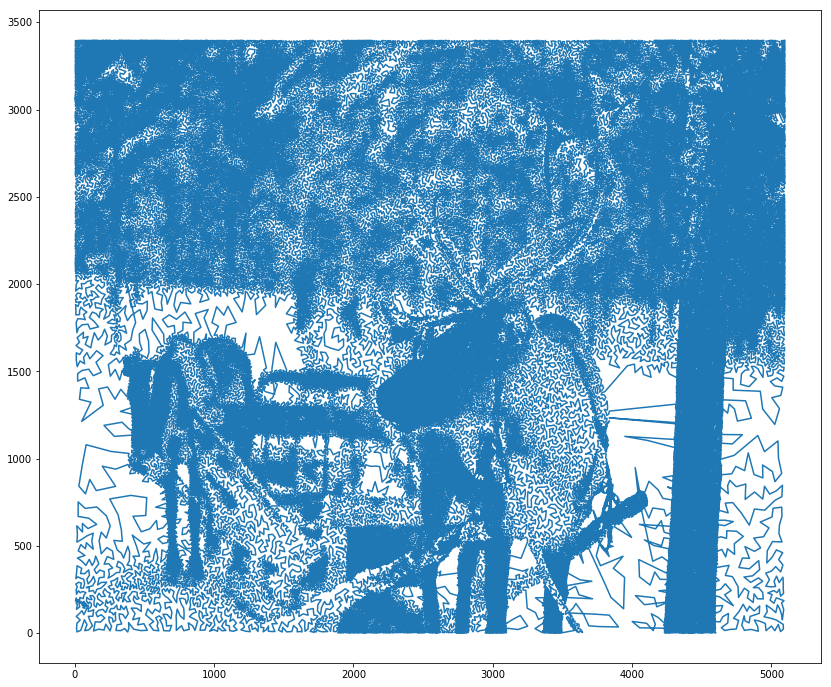

In [51]:
sub_cluster_center_seq4_x = []
sub_cluster_center_seq4_y = []
for i in sub_cluster_sequence4:
    sub_cluster_center_seq4_x.append(np.asarray(sub_cluster_centers4[sub_cluster_centers4['cluster_center']==i]['center_x'])[0])
    sub_cluster_center_seq4_y.append(np.asarray(sub_cluster_centers4[sub_cluster_centers4['cluster_center']==i]['center_y'])[0])

sub_cluster_center_seq4_x = np.asarray(sub_cluster_center_seq4_x).reshape(len(sub_cluster_center_seq4_x),1)
sub_cluster_center_seq4_y = np.asarray(sub_cluster_center_seq4_y).reshape(len(sub_cluster_center_seq4_y),1)
sub_cluster_seq4 = np.concatenate((sub_cluster_center_seq4_x,sub_cluster_center_seq4_y), axis = 1)

start_id = cities4[cities4['CityId']==0]
start_coord = [start_id['X'], start_id['Y']]
start_coord = np.asarray(start_coord).reshape(1,2)
center_seq = np.asarray(sub_cluster_seq4)
center_seq =  np.concatenate((center_seq, start_coord), axis =0)
center_seq =  np.concatenate((start_coord, center_seq), axis =0)

plt.figure(figsize =(14,12))
x = [x[0] for x in center_seq]
y = [x[1] for x in center_seq]

plt.plot(x,y)
plt.scatter(start_id['X'], start_id['Y'], s = 1000, alpha = 0.5)

In [52]:
complete_seq = []
for cluster in sub_cluster_sequence4:
    cluster_id = cities4[cities4['sub_cluster4']==cluster]['CityId']
    cluster_id = np.asarray(cluster_id).ravel()
    for ids in cluster_id:
        complete_seq.append(ids)

In [53]:
len(np.unique(np.asarray(complete_seq)))

197769

In [54]:
to_delete = np.where(np.asarray(complete_seq)==0)
complete_seq1 = np.delete(np.asarray(complete_seq), to_delete)
complete_seq1 = np.append(complete_seq1, 0)
complete_seq1 = np.insert(complete_seq1, 0, 0)

In [55]:
my_submission = pd.DataFrame()
my_submission['Path']= complete_seq1
my_submission.to_csv('my_submission-14Dec.csv', index = None)

In [56]:
total_distance = calculate_total_distance(complete_seq1)
total_distance

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


1703661.758799354

In [57]:
data = np.asarray(cities[['X','Y']])

initial_seq = complete_seq1
final_seq = batch_sequence_update(complete_seq1, data, 5)

In [58]:
total_distance = calculate_total_distance(final_seq)
total_distance 

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


1665957.1210654275

In [ ]:
initial_seq = final_seq
for i in range(1):
    final_seq = batch_sequence_update(final_seq, data, 4)
    final_seq = batch_sequence_update(final_seq, data, 5)
    final_seq = batch_sequence_update(final_seq, data, 6)
    initial_seq = final_seq

In [ ]:
final_seq = initial_seq
total_distance_final = calculate_total_distance(final_seq)
total_distance_final

final_sequences = pd.DataFrame()
final_sequences['Path'] = final_seq
final_sequences.to_csv('final_seq_20Dec-2.csv', index = None)